In [124]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [125]:
#loading data file
data=pd.read_csv('Fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Data Exploration

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [127]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [128]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

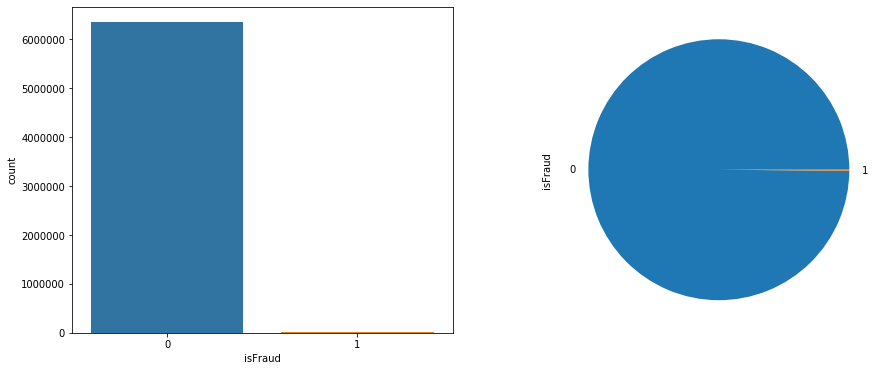

In [129]:
#Data Visualisation
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=data['isFraud'])
plt.subplot(1, 2, 2)
data['isFraud'].value_counts().plot.pie(y='Class')

In [130]:
#Dataset is way too imbalanced so inorder to balave it iam going to perform down/undersampling.

In [131]:
df1=data[data['isFraud']==1]
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [132]:
df2=data[data['isFraud']==0].sample(9000)
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
874372,42,CASH_OUT,151443.91,C432733594,80766.00,0.00,C1080765352,750449.54,901893.45,0,0
6201004,576,PAYMENT,3513.79,C1537990761,9425.00,5911.21,M420779993,0.00,0.00,0,0
4235460,306,PAYMENT,23985.11,C1297201216,0.00,0.00,M273885885,0.00,0.00,0,0
2569090,207,CASH_IN,126660.74,C429727658,2143268.39,2269929.13,C1729911820,2222924.13,2310490.05,0,0
4538508,326,CASH_OUT,33428.78,C973611691,0.00,0.00,C603943978,1726790.94,1760219.72,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2681136,210,CASH_OUT,161213.16,C2104034378,14162.00,0.00,C312768011,6363941.64,6525154.80,0,0
1625319,157,CASH_OUT,433213.52,C1924616303,0.00,0.00,C679811888,537732.40,970945.92,0,0
1471936,141,PAYMENT,9156.75,C893947596,0.00,0.00,M1109628978,0.00,0.00,0,0
1725690,160,CASH_IN,209532.16,C620824169,224.00,209756.16,C1990429347,37981.80,0.00,0,0


In [133]:
df=pd.concat([df1,df2])
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.0,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.0,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.0,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2681136,210,CASH_OUT,161213.16,C2104034378,14162.0,0.00,C312768011,6363941.64,6525154.80,0,0
1625319,157,CASH_OUT,433213.52,C1924616303,0.0,0.00,C679811888,537732.40,970945.92,0,0
1471936,141,PAYMENT,9156.75,C893947596,0.0,0.00,M1109628978,0.00,0.00,0,0
1725690,160,CASH_IN,209532.16,C620824169,224.0,209756.16,C1990429347,37981.80,0.00,0,0


In [134]:
df=df.sample(17213)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6276599,638,CASH_OUT,345116.00,C1587485060,345116.00,0.0,C1268840633,249636.76,594752.77,1,0
4348412,309,TRANSFER,2019508.99,C891657273,2019508.99,0.0,C862850216,0.00,0.00,1,0
2904751,228,CASH_OUT,90521.86,C272645324,0.00,0.0,C1882860489,5848528.47,5939050.32,0,0
4091743,301,CASH_OUT,163056.35,C1081335459,0.00,0.0,C2096026497,24107359.43,24270415.78,0,0
6117851,530,CASH_OUT,19576.96,C158699247,19576.96,0.0,C1193716224,762608.82,782185.77,1,0


In [135]:
#Checking whether there are missing values or not.
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17213 entries, 6276599 to 6061829
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            17213 non-null  int64  
 1   type            17213 non-null  object 
 2   amount          17213 non-null  float64
 3   nameOrig        17213 non-null  object 
 4   oldbalanceOrg   17213 non-null  float64
 5   newbalanceOrig  17213 non-null  float64
 6   nameDest        17213 non-null  object 
 7   oldbalanceDest  17213 non-null  float64
 8   newbalanceDest  17213 non-null  float64
 9   isFraud         17213 non-null  int64  
 10  isFlaggedFraud  17213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.6+ MB


In [137]:
df['isFraud'].value_counts()

0    9000
1    8213
Name: isFraud, dtype: int64

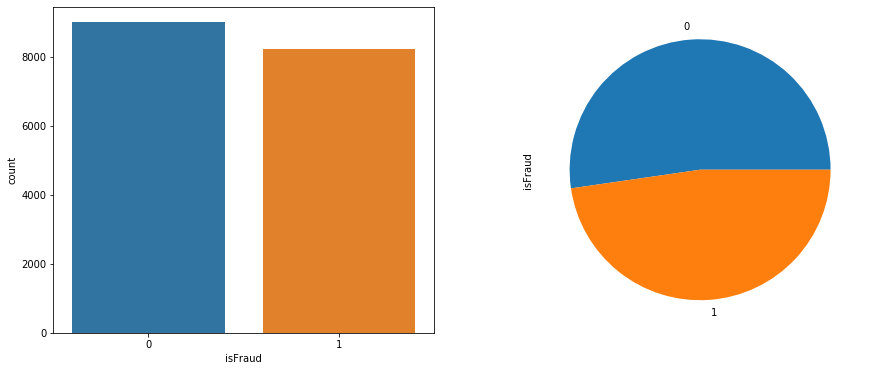

In [138]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df['isFraud'])
plt.subplot(1, 2, 2)
df['isFraud'].value_counts().plot.pie(y='Class')

In [139]:
df=pd.get_dummies(df,columns=['type'],drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6276599,638,345116.00,C1587485060,345116.00,0.00,C1268840633,249636.76,594752.77,1,0,1,0,0,0
4348412,309,2019508.99,C891657273,2019508.99,0.00,C862850216,0.00,0.00,1,0,0,0,0,1
2904751,228,90521.86,C272645324,0.00,0.00,C1882860489,5848528.47,5939050.32,0,0,1,0,0,0
4091743,301,163056.35,C1081335459,0.00,0.00,C2096026497,24107359.43,24270415.78,0,0,1,0,0,0
6117851,530,19576.96,C158699247,19576.96,0.00,C1193716224,762608.82,782185.77,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844315,163,508736.28,C1635192314,0.00,0.00,C1127612996,5081343.27,5590079.55,0,0,1,0,0,0
257320,14,1042148.27,C1591946999,2395.00,0.00,C1551985738,162938.00,9910164.76,0,0,0,0,0,1
920048,43,366468.31,C1528966557,0.00,0.00,C989313013,526536.11,893004.42,0,0,1,0,0,0
1809231,163,20197.81,C1876048364,29700.00,9502.19,M118212884,0.00,0.00,0,0,0,0,1,0


In [140]:
final_df=df.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud'])
final_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6276599,345116.00,345116.00,0.0,249636.76,594752.77,1,1,0,0,0
4348412,2019508.99,2019508.99,0.0,0.00,0.00,1,0,0,0,1
2904751,90521.86,0.00,0.0,5848528.47,5939050.32,0,1,0,0,0
4091743,163056.35,0.00,0.0,24107359.43,24270415.78,0,1,0,0,0
6117851,19576.96,19576.96,0.0,762608.82,782185.77,1,1,0,0,0


# Checking and removing outliers

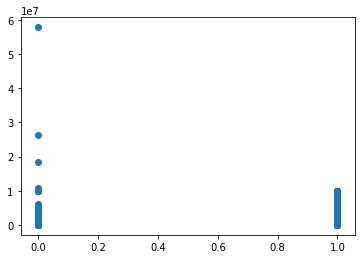

In [141]:
plt.scatter(x=final_df['isFraud'],y=final_df['amount'])

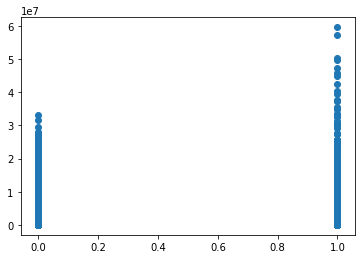

In [142]:
plt.scatter(x=final_df['isFraud'],y=final_df['oldbalanceOrg'])

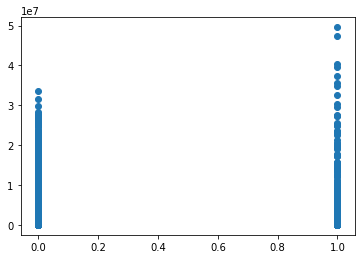

In [143]:
plt.scatter(x=final_df['isFraud'],y=final_df['newbalanceOrig'])

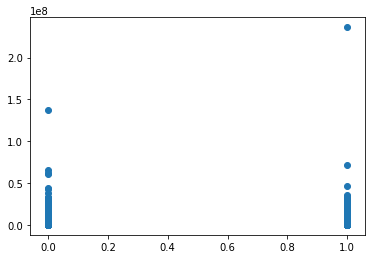

In [144]:
plt.scatter(x=final_df['isFraud'],y=final_df['oldbalanceDest'])

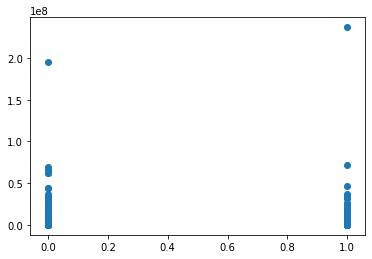

In [145]:
plt.scatter(x=final_df['isFraud'],y=final_df['newbalanceDest'])

In [146]:
final_df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,1.721300e+04,1.721300e+04,1.721300e+04,1.721300e+04,1.721300e+04,17213.000000,17213.000000,17213.000000,17213.000000,17213.000000
mean,7.963385e+05,1.237654e+06,5.548205e+05,8.480942e+05,1.265079e+06,0.477139,0.419450,0.002382,0.177134,0.283274
std,1.874882e+06,3.262846e+06,2.562906e+06,3.295600e+06,3.804498e+06,0.499492,0.493483,0.048748,0.381793,0.450602
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.447964e+04,9.065440e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.676065e+05,1.126562e+05,0.000000e+00,0.000000e+00,1.352653e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.068675e+05,7.678790e+05,0.000000e+00,5.533135e+05,1.107376e+06,1.000000,1.000000,0.000000,0.000000,1.000000
max,5.778780e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
l=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
for i in l:
    q1=final_df[f'{i}'].quantile(0.25)
    q3=final_df[f'{i}'].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
final_df[f'{i}']=final_df[f'{i}'].apply(limit_imputer)

In [148]:
final_df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,1.721300e+04,1.721300e+04,1.721300e+04,1.721300e+04,1.721300e+04,17213.000000,17213.000000,17213.000000,17213.000000,17213.000000
mean,7.963385e+05,1.237654e+06,5.548205e+05,8.480942e+05,7.058792e+05,0.477139,0.419450,0.002382,0.177134,0.283274
std,1.874882e+06,3.262846e+06,2.562906e+06,3.295600e+06,9.895647e+05,0.499492,0.493483,0.048748,0.381793,0.450602
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.447964e+04,9.065440e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.676065e+05,1.126562e+05,0.000000e+00,0.000000e+00,1.352653e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.068675e+05,7.678790e+05,0.000000e+00,5.533135e+05,1.107376e+06,1.000000,1.000000,0.000000,0.000000,1.000000
max,5.778780e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.768439e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
#so basically there are no anomolies and outliers in the dataset that we extracted
#if there are so then we can use the limit imputer function that i created.

# Scaling the Data

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=final_df['isFraud']
X=scaler.fit_transform(final_df.drop(columns=['isFraud']))
x=pd.DataFrame(data=X,columns=final_df.drop(columns=['isFraud']).columns)

In [151]:
x.shape,y.shape

((17213, 9), (17213,))

# Checking and removing Multicollinearity

In [152]:
k=x.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['amount', 'oldbalanceOrg'],
  ['oldbalanceOrg', 'amount'],
  ['oldbalanceOrg', 'newbalanceOrig'],
  ['newbalanceOrig', 'oldbalanceOrg']],
 4)

In [153]:
# 3 pairs are unique with corr>0.5

# Calculating VIF

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=x
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

amount            10.357071
oldbalanceOrg     33.526197
newbalanceOrig    22.315074
oldbalanceDest     1.405762
newbalanceDest     1.795744
type_CASH_OUT      3.593461
type_DEBIT         1.025254
type_PAYMENT       2.668826
type_TRANSFER      3.339156
dtype: float64

In [155]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
    if vif.max()>5:
            print(vif[vif==vif.max()].index[0], 'has been removed')
            data=data.drop(columns=[vif[vif==vif.max()].index[0]])
            return data
    else:
        print('no multicollinearity present anymore')
        return data


In [156]:
for i in range(3):
    vif_data=MC_remover(vif_data)
vif_data.head()

oldbalanceOrg has been removed
no multicollinearity present anymore
no multicollinearity present anymore


,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.240674,-0.216487,-0.181598,-0.112302,1.176466,-0.048863,-0.463966,-0.628676
1,0.652418,-0.216487,-0.257349,-0.713344,-0.850003,-0.048863,-0.463966,1.590644
2,-0.376470,-0.216487,1.517350,2.084371,1.176466,-0.048863,-0.463966,-0.628676
3,-0.337782,-0.216487,7.057878,2.084371,1.176466,-0.048863,-0.463966,-0.628676
4,-0.414311,-0.216487,-0.025940,0.077114,1.176466,-0.048863,-0.463966,-0.628676


In [157]:
x=vif_data
y=final_df['isFraud']

# Splitting the Dataset

In [158]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.75,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12909, 8), (4304, 8), (12909,), (4304,))

# Model Building

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [161]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve,auc

In [162]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [163]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [164]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7014405204460966
Precision -  0.6799251286850725
For  KN
Accuracy -  0.8768587360594795
Precision -  0.8813813813813813
For  DT
Accuracy -  0.8808085501858736
Precision -  0.9287701725097385
For  LR
Accuracy -  0.8176115241635687
Precision -  0.7636061487328625
For  RF
Accuracy -  0.8761617100371747
Precision -  0.8819688598694123
For  AdaBoost
Accuracy -  0.8852230483271375
Precision -  0.9239130434782609
For  BgC
Accuracy -  0.8733736059479554
Precision -  0.8759342301943199
For  ETC
Accuracy -  0.8729089219330854
Precision -  0.8750622200099551
For  GBDT
Accuracy -  0.8924256505576208
Precision -  0.9111111111111111


In [165]:
def result(model):
    
    #fit on data
    model.fit(x_train, y_train)
    
    #prediction
    pred1 = model.predict(x_test)
    pred2 = model.predict(x_train)
    #performance of model
    print("Classification Report for training: \n", classification_report(y_train, pred2))
    print("-" * 100)
    print()
    
    print("Classification Report for testing: \n", classification_report(y_test, pred1))
    print("-" * 100)
    print()
    
    #confusion matrix for model
    print("Confusion Matrix: ")
    cm=confusion_matrix(y_test,pred1)
    print(cm)

In [166]:
result(gbdt)

Classification Report for training: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6750
           1       0.92      0.87      0.89      6159

    accuracy                           0.90     12909
   macro avg       0.90      0.90      0.90     12909
weighted avg       0.90      0.90      0.90     12909

----------------------------------------------------------------------------------------------------

Classification Report for testing: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2250
           1       0.91      0.86      0.88      2054

    accuracy                           0.89      4304
   macro avg       0.89      0.89      0.89      4304
weighted avg       0.89      0.89      0.89      4304

----------------------------------------------------------------------------------------------------

Confusion Matrix: 
[[2078  172]
 [ 291 1763]]


In [167]:
#Gradient Boost classifier model outperformed all other machine learning models giving us 89% accuracy and 91% precision.

# Normal approach

In [168]:
x=final_df.drop(columns=['isFraud'])
y=final_df['isFraud']

In [170]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [171]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_x,y,train_size=0.75,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12909, 9), (4304, 9), (12909,), (4304,))

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [175]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve,auc

In [176]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [177]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [178]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7058550185873605
Precision -  0.6867298578199053
For  KN
Accuracy -  0.9616635687732342
Precision -  0.9547424169475205
For  DT
Accuracy -  0.9795539033457249
Precision -  0.9689885496183206
For  LR
Accuracy -  0.9395910780669146
Precision -  0.9444995044598612
For  RF
Accuracy -  0.9925650557620818
Precision -  0.9898255813953488
For  AdaBoost
Accuracy -  0.9783921933085502
Precision -  0.9711677078327727
For  BgC
Accuracy -  0.9944237918215614
Precision -  0.9922405431619786
For  ETC
Accuracy -  0.9879182156133829
Precision -  0.9840425531914894
For  GBDT
Accuracy -  0.9879182156133829
Precision -  0.9807877041306436


In [185]:
def result(model):
    
    #fit on data
    model.fit(x_train, y_train)
    
    #prediction
    pred1 = model.predict(x_test)
    pred2 = model.predict(x_train)
    #performance of model
    print("Classification Report for training: \n", classification_report(y_train, pred2))
    print("-" * 100)
    print()
    
    print("Classification Report for testing: \n", classification_report(y_test, pred1))
    print("-" * 100)
    print()
    
    #confusion matrix for model
    print("Confusion Matrix: ")
    cm=confusion_matrix(y_test,pred1)
    print(cm)

In [186]:
result(bc)

Classification Report for training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00      6159

    accuracy                           1.00     12909
   macro avg       1.00      1.00      1.00     12909
weighted avg       1.00      1.00      1.00     12909

----------------------------------------------------------------------------------------------------

Classification Report for testing: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2250
           1       0.99      1.00      0.99      2054

    accuracy                           0.99      4304
   macro avg       0.99      0.99      0.99      4304
weighted avg       0.99      0.99      0.99      4304

----------------------------------------------------------------------------------------------------

Confusion Matrix: 
[[2234   16]
 [   8 2046]]


In [187]:
#with this normal approach we are able to achieve almost 100 percent  accuracy and precision with Bagging classifier.